In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
import time
%matplotlib inline

In [2]:
from sklearn.cluster import AffinityPropagation

In [3]:
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv('YearMSD.csv',header=None)

In [5]:
data[0] = data[0].apply(lambda year: year-(year%10))

In [6]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2000,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2000,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2000,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2000,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2000,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [7]:
data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].min())/(data.iloc[:,1:].max() - data.iloc[:,1:].min())

In [8]:
data.iloc[:,1:].describe()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_ds = data[data[0]>1940]
min_samples = data_ds[0].value_counts().min()

In [10]:
min_samples

3102

In [11]:
decades = data_ds[0].unique()

In [12]:
decades

array([2000, 1990, 1980, 1970, 1960, 2010, 1950], dtype=int64)

In [13]:
data_ds.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90],
           dtype='int64')

In [14]:
data_sampled = pd.DataFrame(columns=data_ds.columns)

In [15]:
for decade in decades:
    data_sampled = data_sampled.append(data_ds[data_ds[0]==decade].sample(min_samples))

In [16]:
data_sampled[0] = data_sampled[0].astype(int)

In [17]:
X = data_sampled.iloc[:,1:].values
target = data_sampled.iloc[:,0].values

In [18]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [19]:
from sklearn import decomposition

In [20]:
prin_comp = []
samples, features = X_pca.shape

In [21]:
for m in range(1,features+1):
    prin_comp.append("Principal Component {}".format(m))

In [22]:
cols = prin_comp+["Release Decade"]

In [23]:
data_pca = pd.DataFrame(np.append(X_pca, target.reshape(samples, 1), axis=1), columns=cols)

In [24]:
data_pca["Release Decade"] = data_pca["Release Decade"].astype(int)

In [25]:
print(data_pca.shape)

(21714, 3)


In [26]:
model = KMeans(n_clusters=7)
model.fit(data_pca.iloc[:,:20])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
np.unique(target)

array([1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [28]:
def convertTo7Vals(X):
    myArray = []
    for x in X:
        if x == 1950:
            myArray.append(0)
        elif x == 1960:
            myArray.append(1)
        elif x == 1970:
            myArray.append(2)
        elif x == 1980:
            myArray.append(3)
        elif x == 1990:
            myArray.append(4)
        elif x == 2000:
            myArray.append(5)
        elif x == 2010:
            myArray.append(6)
        
    return myArray

In [29]:
target_new = convertTo7Vals(data_pca.iloc[:,2:].values)

In [30]:
np.array(target_new)

array([5, 5, 5, ..., 0, 0, 0])

In [31]:
start_time = time.time()
kmeans_model = KMeans(n_clusters=7)
kmeans_model.fit(data_pca.iloc[:,:2])
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.723008632659912 seconds ---


In [32]:
kmeans_model.labels_

array([5, 2, 2, ..., 4, 1, 1])

In [33]:
sm.accuracy_score(target_new, kmeans_model.labels_)

0.1639034724141107

Text(0.5,1,'K Means Classification')

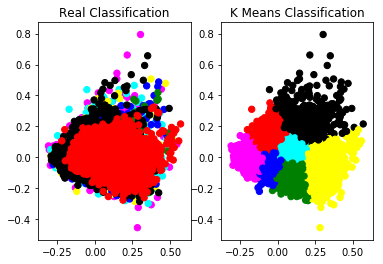

In [34]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'cyan', 'magenta','black'])

plt.subplot(1, 2, 1)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[target_new], s=40)
plt.title('Real Classification')


plt.subplot(1, 2, 2)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[kmeans_model.labels_], s=40)
plt.title('K Means Classification')

In [35]:
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering

In [ ]:
start_time = time.time()
spectral = SpectralClustering(n_clusters=7,
      eigen_solver='arpack',
      affinity='rbf',
      assign_labels='discretize'
  ).fit(data_pca.iloc[:,:2])
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
spectral.labels_

In [ ]:
sm.accuracy_score(target_new, spectral.labels_)

In [ ]:
colormap = np.array(['red', 'lime', 'black', 'purple', 'yellow', 'brown','blue'])

plt.subplot(1, 2, 1)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[target_new], s=40)
plt.title('Real Classification')


plt.subplot(1, 2, 2)
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c=colormap[spectral.labels_], s=40)
plt.title('K Means Classification')